# Implementación de árbol de decisiones binario con scikit-learn

## Librerías

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Creación de función para graficar las clases, conjunto de datos de entrenamiento y de prueba

In [13]:
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
  # Configuración de los puntos y colores
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # Graficar el conjunto de datos
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # Graficar cada una de las clases
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Clase {cl}',
                edgecolor='black')
  # Resaltar los datos de prueba
  if test_idx:
    # Grafica todos los datos
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='none', edgecolor='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='Conjunto prueba')






## Creación del modelo

In [14]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
tree_model = DecisionTreeClassifier(criterion='gini', # Aplicamos la impureza Gini
                                      max_depth=4,    # configuramos nuestro arbol con 4 ramas de profundidad
                                      random_state=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

## Graficación del modelo

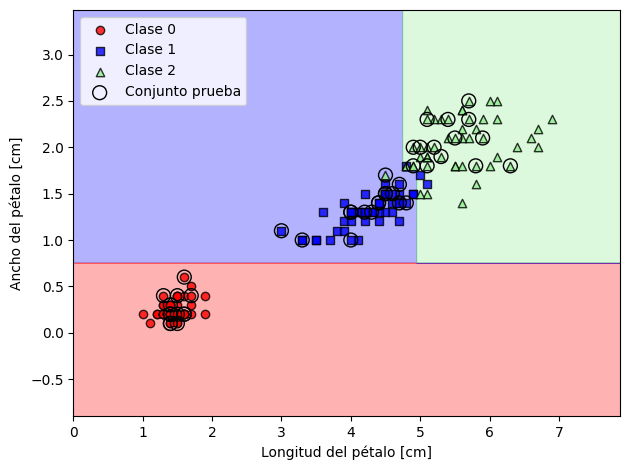

In [15]:
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree_model,test_idx=range(105, 150))
plt.xlabel('Longitud del pétalo [cm]')
plt.ylabel('Ancho del pétalo [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Graficación árbol de decisiones

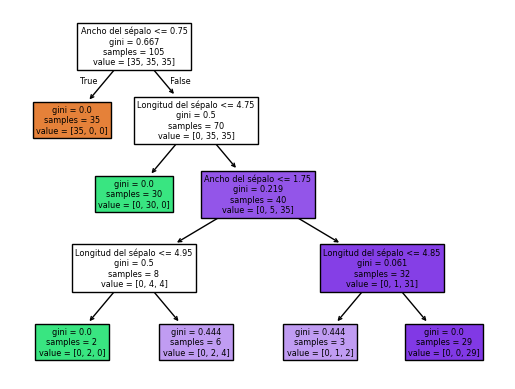

In [16]:
feature_names = ['Longitud del sépalo', 'Ancho del sépalo','Longitud del pétalo', 'Ancho del pétalo']
tree.plot_tree(tree_model,feature_names=feature_names,filled=True)
plt.show()